# Visualizing CO2 Emissions 🌎

<img src="https://static1.squarespace.com/static/55cce2c6e4b0513a93e643d0/55d637fde4b0a862eed666ae/5703efa1859fd07e226b5d19/1523291953647/YouthCamp2018BG.jpg?format=1500w" />

Photo by [Noah Silliman](https://unsplash.com/@noahsilliman)

---

Today we will work with CO2 emissions data of all countries worldwide.

**Q1**. Load the dataset `CO2_per_capita.csv` into a **Pandas Dataframe**. What does this dataset contain?

In [25]:
# TODO: Load and describe dataset
import pandas as pd
df = pd.read_csv('CO2_per_capita.csv', sep = ";")
df[:8]

,Country Name,Country Code,Year,CO2 Per Capita (metric tons)
0,Aruba,ABW,1960,NaN
1,Aruba,ABW,1961,NaN
2,Aruba,ABW,1962,NaN
3,Aruba,ABW,1963,NaN
4,Aruba,ABW,1964,NaN
5,Aruba,ABW,1965,NaN
6,Aruba,ABW,1966,NaN
7,Aruba,ABW,1967,NaN


**Q2**. What questions could be interesting to answer with the available data? Which charts would you use to answer those questions?

> 🔦 **Hint**: When thinking about what visualizations could bring interesting insights, do not hesitate to start "wireframing" those charts on paper.

# How are gas emissions evolving? 

TODO: answer question in Markdown


**Q3**. We are going to answer the question: **which countries have the highest CO2 emissions per capita lately?**
- Think about how what chart could answer this question efficiently
- Think about how the data should be transformed in order to draw this chart
- Transform your data accordingly

In [4]:
# TODO: Transform your data so that you can easily plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
x=df['Year']
y=df['CO2 Per Capita (metric tons)']

plt.bar(x=x, height=y)

plt.show()

**Q4**. Draw your chart with `seaborn` library and answer the original question.

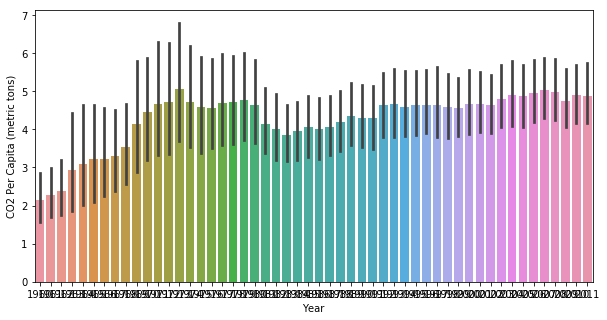

In [48]:
# TODO: Visualize your properly transformed dataframe
import seaborn as sns

plt.figure(figsize=(10,5))
x=df['Year']
y=df['CO2 Per Capita (metric tons)']

sns.barplot(x=x, y=y, data=df)

plt.show()

**54**. Are the annual emissions per capita decreasing over time in France? in Thailand? 

> 🔦 **Hint**: Again, you should follow the same process as before:
> - which chart can answer my question?
> - what data do I need to draw this chart?
> - get the data and draw the chart

What can your say about CO2 emissions in these countries?

<Figure size 720x360 with 0 Axes>

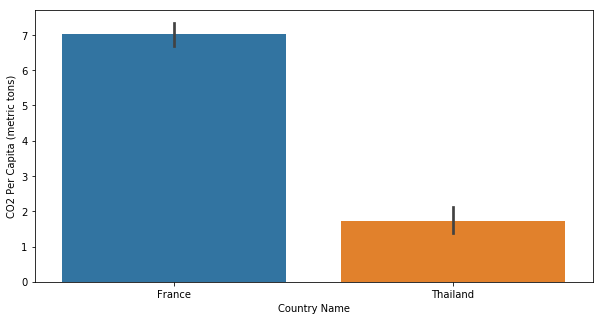

In [67]:
# TODO: Evolution of annual emissions per capita
plt.figure(figsize=(10,5))
f = df.loc[df['Country Name'] == 'France']
t = df.loc[df['Country Name'] == 'Thailand']

a = pd.concat([f, t], axis=0)

plt.figure(figsize=(10,5))
x=a['Country Name']
y=a['CO2 Per Capita (metric tons)']

sns.barplot(x=x, y=y, data=df)

plt.show()

**Q6 [bonus]**. This one is bonus, come back to this question if you finish other challenges early. 😝

Have a look at `folium` library, and use it to visualize CO2 emissions per capita data on a World map.

> 🔦 **Hints**:
> - You can **create a map** this way:
>     ``` python
>     import folium
>     m = folium.Map()
>     ```
> - You can **add a circle on the map** like this:
>     ``` python
>     folium.Circle(
>         location=[longitude, latitude],
>         popup=name,
>         radius=100
>     ).add_to(m)
>     ```
> - You will also need the function `get_boundingbox_country` below, that will give you the longitude and latitude of a country based on it's name (if you inspect the function, you will see it's a simple function requesting an API - you remember I hope 🔌 - to get the information).

In [10]:
# This function is useful to answer bonus question
import requests

def get_boundingbox_country(country, output_as='boundingbox'):
    """
    get the bounding box of a country in EPSG4326 given a country name

    Parameters
    ----------
    country : str
        name of the country in english and lowercase
    output_as : 'str
        chose from 'boundingbox' or 'center'. 
         - 'boundingbox' for [latmin, latmax, lonmin, lonmax]
         - 'center' for [latcenter, loncenter]

    Returns
    -------
    output : list
        list with coordinates as str
    """
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?country=',
                             country,
                             '&format=json&polygon=0')
    response = requests.get(url).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lat','lon']]
        output = [float(i) for i in lst]
    return output

# Example
print("Coordinates of France are long={} and lat={}".format(
            get_boundingbox_country("France", output_as="center")[0],
            get_boundingbox_country("France", output_as="center")[1]))

Coordinates of France are long=46.603354 and lat=1.8883335


In [9]:
# TODO: Visualize your data on a World map
